# EastWestAirlines
Obtain optimum number of clusters. 


The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

In [1]:
import pandas as pd

In [2]:
airline= pd.read_csv("EastWestAirlines.csv")
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [4]:
# Normalization
def norm(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [5]:
# Normalized df
norm_airline_df=norm(airline.iloc[:,1:])
norm_airline_df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


# Hierarchial Clustering 

In [6]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns

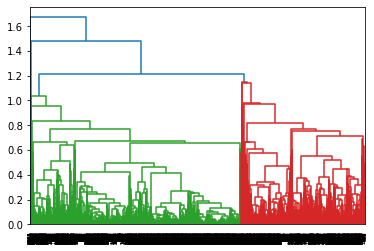

In [7]:
# creating dendrograms
dendrogram=sch.dendrogram(sch.linkage(norm_airline_df,method='average'))
dendrogram;

In [8]:
# creating clusters
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='average')
hc

AgglomerativeClustering(linkage='average', n_clusters=3)

In [9]:
y_hc=hc.fit_predict(norm_airline_df)
clusters=pd.DataFrame(y_hc,columns=['Clusters'])
clusters

,Clusters
0,0
1,0
2,0
3,0
4,0
...,...
3994,0
3995,0
3996,0
3997,0


In [10]:
airline['H_Clusterid']=clusters
airline.sort_values('H_Clusterid')

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,H_Clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
2656,2676,644881,2600,1,1,1,14350,28,10850,26,2511,1,0
2657,2677,61081,0,4,1,1,37682,21,2000,4,2509,0,0
2658,2678,27438,0,1,1,1,2528,6,2528,6,2490,0,0
2659,2679,14748,0,1,1,1,2210,7,0,0,2497,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,2032,53232,888,4,1,1,80696,65,22100,45,3831,1,1
3583,3606,160114,500,1,1,1,71954,86,30817,53,1373,1,1
3235,3257,287033,0,1,1,1,26161,58,12873,53,2272,1,1
3594,3617,27619,0,4,1,1,83726,68,14050,46,1325,1,1


In [11]:
airline.groupby('H_Clusterid').agg(['mean']).reset_index()

,H_Clusterid,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2014.139209,7.313442e+04,143.947421,2.059339,1.014522,1.012268,17096.29319,11.539059,439.434151,1.32023,4119.688282,0.369554
1,1,3128.000000,1.319995e+05,347.000000,2.500000,1.000000,1.000000,65634.25000,69.250000,19960.000000,49.25000,2200.250000,1.000000
2,2,279.000000,1.704838e+06,0.000000,1.000000,1.000000,1.000000,17108.00000,32.000000,4823.000000,23.00000,7283.000000,1.000000


# K-Means

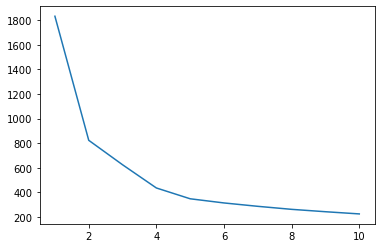

In [12]:
# to get value for k
from sklearn.cluster import KMeans
l=[]
for i in range(1,11):
    k=KMeans(n_clusters=i,random_state=42)
    k.fit(norm_airline_df)
    l.append(k.inertia_)
    
# plotting th elbow graph
import matplotlib.pyplot as plt
plt.plot(range(1, 11), l)

In [13]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4)
kmeans.fit(norm_airline_df)
y_kmeans = kmeans.predict(norm_airline_df)

In [14]:
y_kmeans

array([1, 1, 1, ..., 0, 1, 1])

In [15]:
airline["Cluster_no"] = y_kmeans

airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,H_Clusterid,Cluster_no
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0,1


In [16]:
airline.groupby('Cluster_no').agg(['mean'])


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,H_Clusterid
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Cluster_no,,,,,,,,,,,,,
0,1613.016089,108317.387376,198.336634,3.915842,1.001238,1.025990,45609.657178,20.201733,713.728960,2.142327,4863.439356,1,0.002475
1,2284.375857,40747.617290,92.345809,1.092778,1.017923,1.004217,3335.152873,6.488666,226.599895,0.658935,3619.111755,0,0.000000
2,1904.763744,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245,10.476969,1030.112927,3.148588,4338.867756,1,0.005944
3,1833.460548,118032.061192,73.112721,3.576490,1.001610,1.022544,31282.666667,17.251208,225.352657,0.632850,4436.307568,0,0.000000


# DB SCAN

In [17]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.5,min_samples=12)
dbscan.fit(norm_airline_df)

DBSCAN(min_samples=12)

In [18]:
y=dbscan.labels_
y

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [19]:
airline["Cluster_no"] =y
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,H_Clusterid,Cluster_no
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0,0


In [20]:
airline.groupby('Cluster_no').agg(['mean']).reset_index()

,Cluster_no,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,H_Clusterid
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,2078.638298,138682.021277,75.957447,1.957447,1.893617,1.936170,49014.787234,26.489362,2438.042553,7.000000,4212.085106,0.659574,0.12766
1,0,2171.018101,59581.308126,88.730088,1.709171,1.000000,1.001609,10053.188656,9.055511,226.570394,0.651649,3823.383347,0.000000,0.00000
2,1,1740.830345,95908.293793,242.869655,2.675172,1.000000,1.000690,28358.131034,15.464138,799.014483,2.435172,4628.304138,1.000000,0.00000
3,2,2388.250000,39218.500000,0.000000,1.000000,2.000000,1.000000,9189.250000,13.500000,209.375000,0.812500,3511.187500,0.000000,0.00000


# Crime Data
to identify the number of clusters formed and draw inferences.


Data Description:
Murder -- Murder rates in different places of United States
Assualt- Assualt rate in different places of United States
UrbanPop - urban population in different places of United States
Rape - Rape rate in different places of United States


In [21]:
crime=pd.read_csv("crime_data.csv")
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [22]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [23]:
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [24]:
crime1=crime.drop(['Unnamed: 0'],axis=1)
crime1

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [25]:
# Normalizing data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler_df = scaler.fit_transform(crime1.iloc[:,:])
print(scaler_df)


[[0.74698795 0.65410959 0.44067797 0.35917313]
 [0.55421687 0.74657534 0.27118644 0.96124031]
 [0.43975904 0.85273973 0.81355932 0.6124031 ]
 [0.48192771 0.49657534 0.30508475 0.31524548]
 [0.4939759  0.79109589 1.         0.86046512]
 [0.42771084 0.54452055 0.77966102 0.81136951]
 [0.15060241 0.22260274 0.76271186 0.09819121]
 [0.30722892 0.6609589  0.6779661  0.21963824]
 [0.87951807 0.99315068 0.81355932 0.63565891]
 [1.         0.56849315 0.47457627 0.47803618]
 [0.27108434 0.00342466 0.86440678 0.33333333]
 [0.10843373 0.25684932 0.37288136 0.17829457]
 [0.57831325 0.69863014 0.86440678 0.43152455]
 [0.38554217 0.23287671 0.55932203 0.35400517]
 [0.08433735 0.03767123 0.42372881 0.10335917]
 [0.31325301 0.23972603 0.57627119 0.27648579]
 [0.53614458 0.21917808 0.33898305 0.23255814]
 [0.87951807 0.69863014 0.57627119 0.38501292]
 [0.07831325 0.13013699 0.3220339  0.0129199 ]
 [0.63253012 0.87328767 0.59322034 0.52971576]
 [0.21686747 0.35616438 0.89830508 0.23255814]
 [0.68072289 

In [26]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns

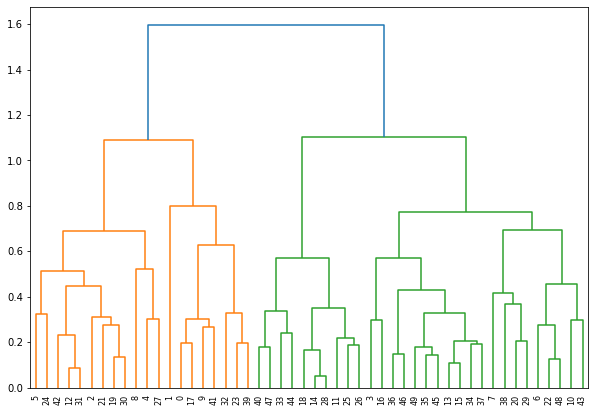

In [27]:
plt.figure(figsize=(10, 7))  
dendrogram=sch.dendrogram(sch.linkage(scaler_df,method='complete'))
#dendrogram;
#plt.figure(figsize=(10, 7))  
#dendograms=sch.dendrogram(sch.linkage(scaler_df,'complete'))


In [28]:
hc1=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
hc1


AgglomerativeClustering(n_clusters=3)

In [29]:
y_hc1=hc1.fit_predict(scaler_df)
cluster_no=pd.DataFrame(y_hc1,columns=['Clusters'])
cluster_no



,Clusters
0,0
1,0
2,0
3,1
4,0
5,0
6,1
7,1
8,0
9,0


In [30]:
crime['H_Clusterid']=cluster_no
crime.sort_values('H_Clusterid')

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,H_Clusterid
0,Alabama,13.2,236,58,21.2,0
42,Texas,12.7,201,80,25.5,0
41,Tennessee,13.2,188,59,26.9,0
39,South Carolina,14.4,279,48,22.5,0
32,North Carolina,13.0,337,45,16.1,0
31,New York,11.1,254,86,26.1,0
30,New Mexico,11.4,285,70,32.1,0
27,Nevada,12.2,252,81,46.0,0
23,Mississippi,16.1,259,44,17.1,0
21,Michigan,12.1,255,74,35.1,0


In [31]:
crime.groupby('H_Clusterid').agg(['mean']).reset_index()


,H_Clusterid,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,12.165000,255.250000,68.400000,29.165000
1,1,6.055556,140.055556,71.333333,18.683333
2,2,3.091667,76.000000,52.083333,11.833333


# K Means

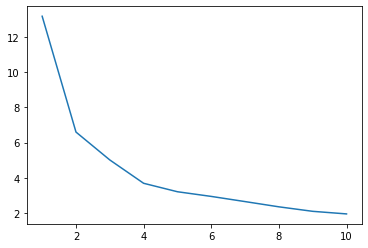

In [32]:
# to get value for k
from sklearn.cluster import KMeans
l=[]
for i in range(1,11):
    k=KMeans(n_clusters=i,random_state=42)
    k.fit(scaler_df)
    l.append(k.inertia_)
    
# plotting th elbow graph
import matplotlib.pyplot as plt
plt.plot(range(1, 11), l)

In [33]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4)
kmeans.fit(scaler_df)
y_kmeans = kmeans.predict(scaler_df)
y_kmeans

array([3, 1, 1, 3, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 2, 3, 2, 1, 0, 1,
       2, 3, 0, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0])

In [34]:
crime["k_cluster"] = y_kmeans
crime.sort_values('k_cluster')

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,H_Clusterid,k_cluster
24,Missouri,9.0,178,70,28.2,0,0
46,Washington,4.0,145,73,26.2,1,0
45,Virginia,8.5,156,63,20.7,1,0
43,Utah,3.2,120,80,22.9,1,0
38,Rhode Island,3.4,174,87,8.3,1,0
37,Pennsylvania,6.3,106,72,14.9,1,0
36,Oregon,4.9,159,67,29.3,1,0
35,Oklahoma,6.6,151,68,20.0,1,0
34,Ohio,7.3,120,75,21.4,1,0
29,New Jersey,7.4,159,89,18.8,1,0


In [35]:
crime.groupby('k_cluster').agg(['mean']).reset_index()


,k_cluster,Murder,Assault,UrbanPop,Rape,H_Clusterid
,,mean,mean,mean,mean,mean
0,0,5.852941,141.176471,73.647059,19.335294,0.941176
1,1,10.966667,264.000000,76.500000,33.608333,0.000000
2,2,3.600000,78.538462,52.076923,12.176923,1.923077
3,3,13.937500,243.625000,53.750000,21.412500,0.125000


# DB SCAN

In [36]:
dbscan=DBSCAN(eps=0.3,min_samples=5)
dbscan.fit(scaler_df)

DBSCAN(eps=0.3)

In [37]:
y=dbscan.labels_
y

array([ 0, -1, -1,  1, -1, -1,  1, -1, -1,  0,  1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [39]:
from sklearn.metrics import silhouette_score as sscore
ss=sscore(scaler_df,dbscan.labels_)
ss

0.2811169127225511

In [40]:
crime["dbCluster_no"] =y
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,H_Clusterid,k_cluster,dbCluster_no
0,Alabama,13.2,236,58,21.2,0,3,0
1,Alaska,10.0,263,48,44.5,0,1,-1
2,Arizona,8.1,294,80,31.0,0,1,-1
3,Arkansas,8.8,190,50,19.5,1,3,1
4,California,9.0,276,91,40.6,0,1,-1
5,Colorado,7.9,204,78,38.7,0,1,-1
6,Connecticut,3.3,110,77,11.1,1,0,1
7,Delaware,5.9,238,72,15.8,1,0,-1
8,Florida,15.4,335,80,31.9,0,1,-1
9,Georgia,17.4,211,60,25.8,0,3,0


In [41]:
crime.groupby('dbCluster_no').agg(['mean']).reset_index()

,dbCluster_no,Murder,Assault,UrbanPop,Rape,H_Clusterid,k_cluster
,,mean,mean,mean,mean,mean,mean
0,-1,10.992857,271.500000,71.357143,30.485714,0.071429,1.214286
1,0,14.720000,232.600000,58.200000,23.720000,0.000000,3.000000
2,1,5.222581,115.290323,64.096774,16.651613,1.322581,0.967742
